In [48]:
from google.colab import files
import re
from collections import Counter

In [ ]:
uploaded = files.upload()

In [2]:
import pandas as pd

df_1 = pd.read_csv("cyberbullying_tweets.csv")
# print(df_1)

df_2 = (pd.read_csv("twitter_sexism_parsed_dataset.csv")
        [["Text", "Annotation"]]
        .rename(columns={
            "Text": "tweet_text",
            "Annotation": "cyberbullying_type"
            }
        ))
# print(df_2)

df_3 = (pd.read_csv("twitter_racism_parsed_dataset.csv")
        [["Text", "Annotation"]]
        .rename(columns={
            "Text": "tweet_text",
            "Annotation": "cyberbullying_type"
            }
        ))
# print(df_3)

df_4 = (pd.read_csv("twitter_parsed_dataset.csv")
        [["Text", "Annotation"]]
        .rename(columns={
            "Text": "tweet_text",
            "Annotation": "cyberbullying_type"
            }
        ))
# print(df_4)

df_new = pd.concat([df_2, df_3, df_4])

In [17]:
df_new

,tweet_text,cyberbullying_type
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism
1,There's some very hate able teams this year #MKR,none
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",none
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism
...,...,...
16846,"Feeling so sorry for the girls, they should be...",none
16847,#MKR 'pretty good dishes we're happy with' - O...,none
16848,RT @colonelkickhead: Deconstructed lemon tart!...,none
16849,@versacezaynx @nyazpolitics @greenlinerzjm You...,none


In [18]:
df_new.drop_duplicates('tweet_text', inplace=True)
df_new

,tweet_text,cyberbullying_type
0,RT @BeepsS: @senna1 @BeepsS: I'm not sexist bu...,sexism
1,There's some very hate able teams this year #MKR,none
2,"RT @The_Eccles: ""Everyone underestimated us"" \...",none
3,RT @NOTLukeDarcy: did @Channel7 or #MKR actual...,none
4,"No, you don't. @Shut_Up_Jeff: I thought of a r...",sexism
...,...,...
13401,@UmarFarooq_ @FaheemHus @jackmjenkins For exam...,racism
13418,Hopefully someone cooks Drasko in the next ep ...,racism
13419,"The myth of ""moderate"" Islamic rebels. They a...",racism
13423,@loveconcursall @ottomanland ISIS is a giant e...,racism


In [22]:
df_new['cyberbullying_type'].value_counts()

none      11501
sexism     3377
racism     1970
Name: cyberbullying_type, dtype: int64

In [57]:
df_new['cyberbullying_type'].replace('sexism', 'gender', inplace=True)
df_new['cyberbullying_type'].replace('racism', 'religion', inplace=True)
df_new['cyberbullying_type'].replace('none', 'not_cyberbullying', inplace=True)
df_new['cyberbullying_type'].value_counts()

not_cyberbullying    11501
gender                3377
religion              1970
Name: cyberbullying_type, dtype: int64

In [21]:
df_new.dropna(inplace=True)

In [58]:
df_final = pd.concat([df_1, df_new])
df_final

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
13401,@UmarFarooq_ @FaheemHus @jackmjenkins For exam...,religion
13418,Hopefully someone cooks Drasko in the next ep ...,religion
13419,"The myth of ""moderate"" Islamic rebels. They a...",religion
13423,@loveconcursall @ottomanland ISIS is a giant e...,religion


In [67]:
df_final.drop_duplicates('tweet_text', inplace=True)
df_final.shape

(52239, 2)

In [68]:
df_final.describe()

,tweet_text,cyberbullying_type
count,52239,52239
unique,52239,6
top,"In other words #katandandre, your food was cra...",not_cyberbullying
freq,1,12926


In [70]:
df_final['cyberbullying_type'].value_counts()

not_cyberbullying      12926
gender                  8798
religion                8328
age                     7992
ethnicity               7952
other_cyberbullying     6243
Name: cyberbullying_type, dtype: int64

Text(0.5, 1.0, 'Classes Balance')

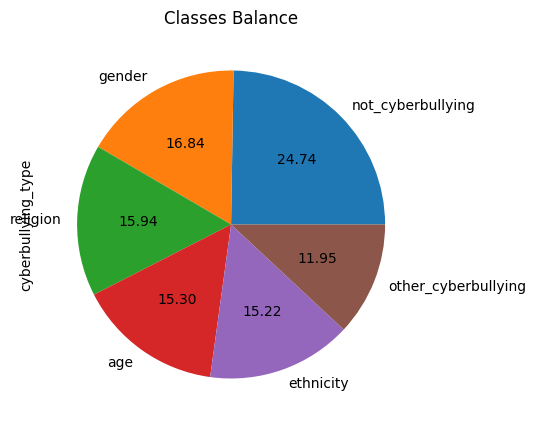

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(10, 5))
df_final['cyberbullying_type'].value_counts().plot.pie(autopct="%.2f", ax=axs)
axs.set_title("Classes Balance")

In [82]:
df_wrong = df_final.loc[df_final['tokenized_text_len'] > 100]
df_wrong

,tweet_text,cyberbullying_type,tokenized_text_len
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying,289
3030,He embellished the afternoon with moustachioed...,not_cyberbullying,181
4846,@andrea_gcav: @viviaanajim recuerdas como noso...,not_cyberbullying,133
10922,don't make rape jokes!!! don't make gay jokes!...,gender,237
14168,IT CALLS THE FUNCTION TO THE PROCESS OR IT GE…...,gender,196
15621,"@ufcpride40: : Terry Bean, prominent gay activ...",gender,211
24516,@NICKIMINAJ: #WutKinda\r\nAt this rate the MKR...,other_cyberbullying,692
25411,@Sweetie_Niesha: So Im getting bullied via twi...,other_cyberbullying,159
25939,If cats looked like frogs we'd realize what na...,other_cyberbullying,135
29205,is feminazi an actual word with a denot…\r\n@N...,other_cyberbullying,790


In [86]:
df_wrong.drop('tokenized_text_len', axis=1, inplace=True)
df_wrong.head()

<ipython-input-86-8b7e1aa86136>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrong.drop('tokenized_text_len', axis=1, inplace=True)


,tweet_text,cyberbullying_type
1317,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying
3030,He embellished the afternoon with moustachioed...,not_cyberbullying
4846,@andrea_gcav: @viviaanajim recuerdas como noso...,not_cyberbullying
10922,don't make rape jokes!!! don't make gay jokes!...,gender
14168,IT CALLS THE FUNCTION TO THE PROCESS OR IT GE…...,gender


In [93]:
df_wrong['tweet_text'] = df_wrong['tweet_text'].apply(lambda x: x.split('\r\n'))
df_wrong

,tweet_text,cyberbullying_type
1317,[@EurekAlertAAAS: Researchers push to import t...,not_cyberbullying
3030,[He embellished the afternoon with moustachioe...,not_cyberbullying
4846,[@andrea_gcav: @viviaanajim recuerdas como nos...,not_cyberbullying
10922,[don't make rape jokes!!! don't make gay jokes...,gender
14168,[IT CALLS THE FUNCTION TO THE PROCESS OR IT GE...,gender
15621,"[@ufcpride40: : Terry Bean, prominent gay acti...",gender
24516,"[@NICKIMINAJ: #WutKinda, At this rate the MKR ...",other_cyberbullying
25411,[@Sweetie_Niesha: So Im getting bullied via tw...,other_cyberbullying
25939,[If cats looked like frogs we'd realize what n...,other_cyberbullying
29205,"[is feminazi an actual word with a denot…, @Na...",other_cyberbullying


In [101]:
unlabeled_tweets = []
for errors in df_wrong['tweet_text']:
  unlabeled_tweets.extend(errors)

unlabeled_tweets

['@EurekAlertAAAS: Researchers push to import top anti-bullying program to US schools http://t.co/UPZrMbl',
 '@NomCookiesNom Instead of personal attacks, maybe you can explain why there are more than 100 Islamic terrorist groups.',
 '@_Finessinfool yea imma bring in tomorrow',
 '#mkr I think Colin might not be a fan of the meatballs.',
 '@KatieBatterman yeah, we should talk. I was just about to send an email over to them right before I was told it was retracted.',
 "I'm not a fan of the bears from QLD. 💩 #MKR",
 "@eDRoaCH @orvtech this isn't de-anonymizing. the phone # wouldn't necessarily be stored. no names would be required.",
 "@owlcity hey adam :) I've been to 2 of your concerts &amp; haven't been allowed to meet you. when will I be able to?",
 'Me: The boat or the thing that melts Nazi faces?',
 'Watching a video of the snowman play from primary school! Go Tanners Wood haha #oldschool',
 '@eranubuwah @352_7538 Taking tiny villages while loosing major cities like Tikrit.',
 'Sofro

In [102]:
unlabeled_df = pd.DataFrame()

In [103]:
unlabeled_df['tweet_text'] = unlabeled_tweets

In [106]:
unlabeled_df.to_csv('unlabeled_tweets.csv')

In [97]:
df_wrong.to_csv("broken_tweets.csv")

In [120]:
labeled_df = pd.read_csv('labeled_tweets.csv')
labeled_df.head()

,Unnamed: 0,tweet_text,cyberbullying_type
0,0,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying
1,1,"@NomCookiesNom Instead of personal attacks, ma...",religion
2,2,@_Finessinfool yea imma bring in tomorrow,not_cyberbullying
3,3,#mkr I think Colin might not be a fan of the m...,not_cyberbullying
4,4,"@KatieBatterman yeah, we should talk. I was ju...",not_cyberbullying


In [121]:
labeled_df.drop(columns='Unnamed: 0', inplace=True)
labeled_df.head()

,tweet_text,cyberbullying_type
0,@EurekAlertAAAS: Researchers push to import to...,not_cyberbullying
1,"@NomCookiesNom Instead of personal attacks, ma...",religion
2,@_Finessinfool yea imma bring in tomorrow,not_cyberbullying
3,#mkr I think Colin might not be a fan of the m...,not_cyberbullying
4,"@KatieBatterman yeah, we should talk. I was ju...",not_cyberbullying


In [115]:
df_final.drop(columns=['tokenized_text_len', 'text_len'], inplace=True)
df_final.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [122]:
df = pd.concat([df_final, labeled_df])

In [123]:
df.reset_index(drop=True, inplace=True)
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
52533,Fuck red &amp; white dumb ugly nigger name Way...,ethnicity
52534,Bitch u mad........ I see!!!! RT @tayyoung_: F...,gender
52535,"8.5/10 first of all, i love your profile pictu...",not_cyberbullying
52536,@Dustin___Lee when you find him let me know so...,not_cyberbullying


In [124]:
df["cyberbullying_type"].value_counts()

not_cyberbullying      13133
gender                  8815
religion                8332
age                     7993
ethnicity               7967
other_cyberbullying     6298
Name: cyberbullying_type, dtype: int64

In [127]:
df.drop_duplicates('tweet_text', inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,tweet_text,cyberbullying_type
count,52424,52424
unique,52424,6
top,"In other words #katandandre, your food was cra...",not_cyberbullying
freq,1,13034


In [129]:
df.to_csv("dataset.csv")